### 1. Download an example image from ZTF using the IRSA website. You can save the image to disk manually at this point. Open it using python FITS interface and show the image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, simple_norm
plt.style.use(astropy_mpl_style)

In [2]:
from astropy.io import fits

img1_fname = "data/ztf_000792_zg_c06_q4_refimg.fits"

def plot_image(filename, norm=False):

    with fits.open(filename) as hdul:
    # fits.open() returns an HDUList (Header Data Unit) containing file data and metadata
        hdul.info()

    img_data = fits.getdata(filename, ext=0)    # ext=0 because image data is located in PRIMARY, a.k.a. extension 0
    # normalize image data values from 10,000s to <5
    norm_class = simple_norm(img_data, stretch='log')
    img_data_norm = norm_class(img_data)
    
    plt.figure(figsize=(8,8), dpi=400)
    plt.grid(visible=False)
    if norm:
        plt.imshow(img_data_norm, cmap='gray')
    else:
        plt.imshow(img_data, vmin=250, vmax=500, cmap='gray')
    plt.colorbar()
    plt.show()
    plt.close()
    

Filename: data/ztf_000792_zg_c06_q4_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


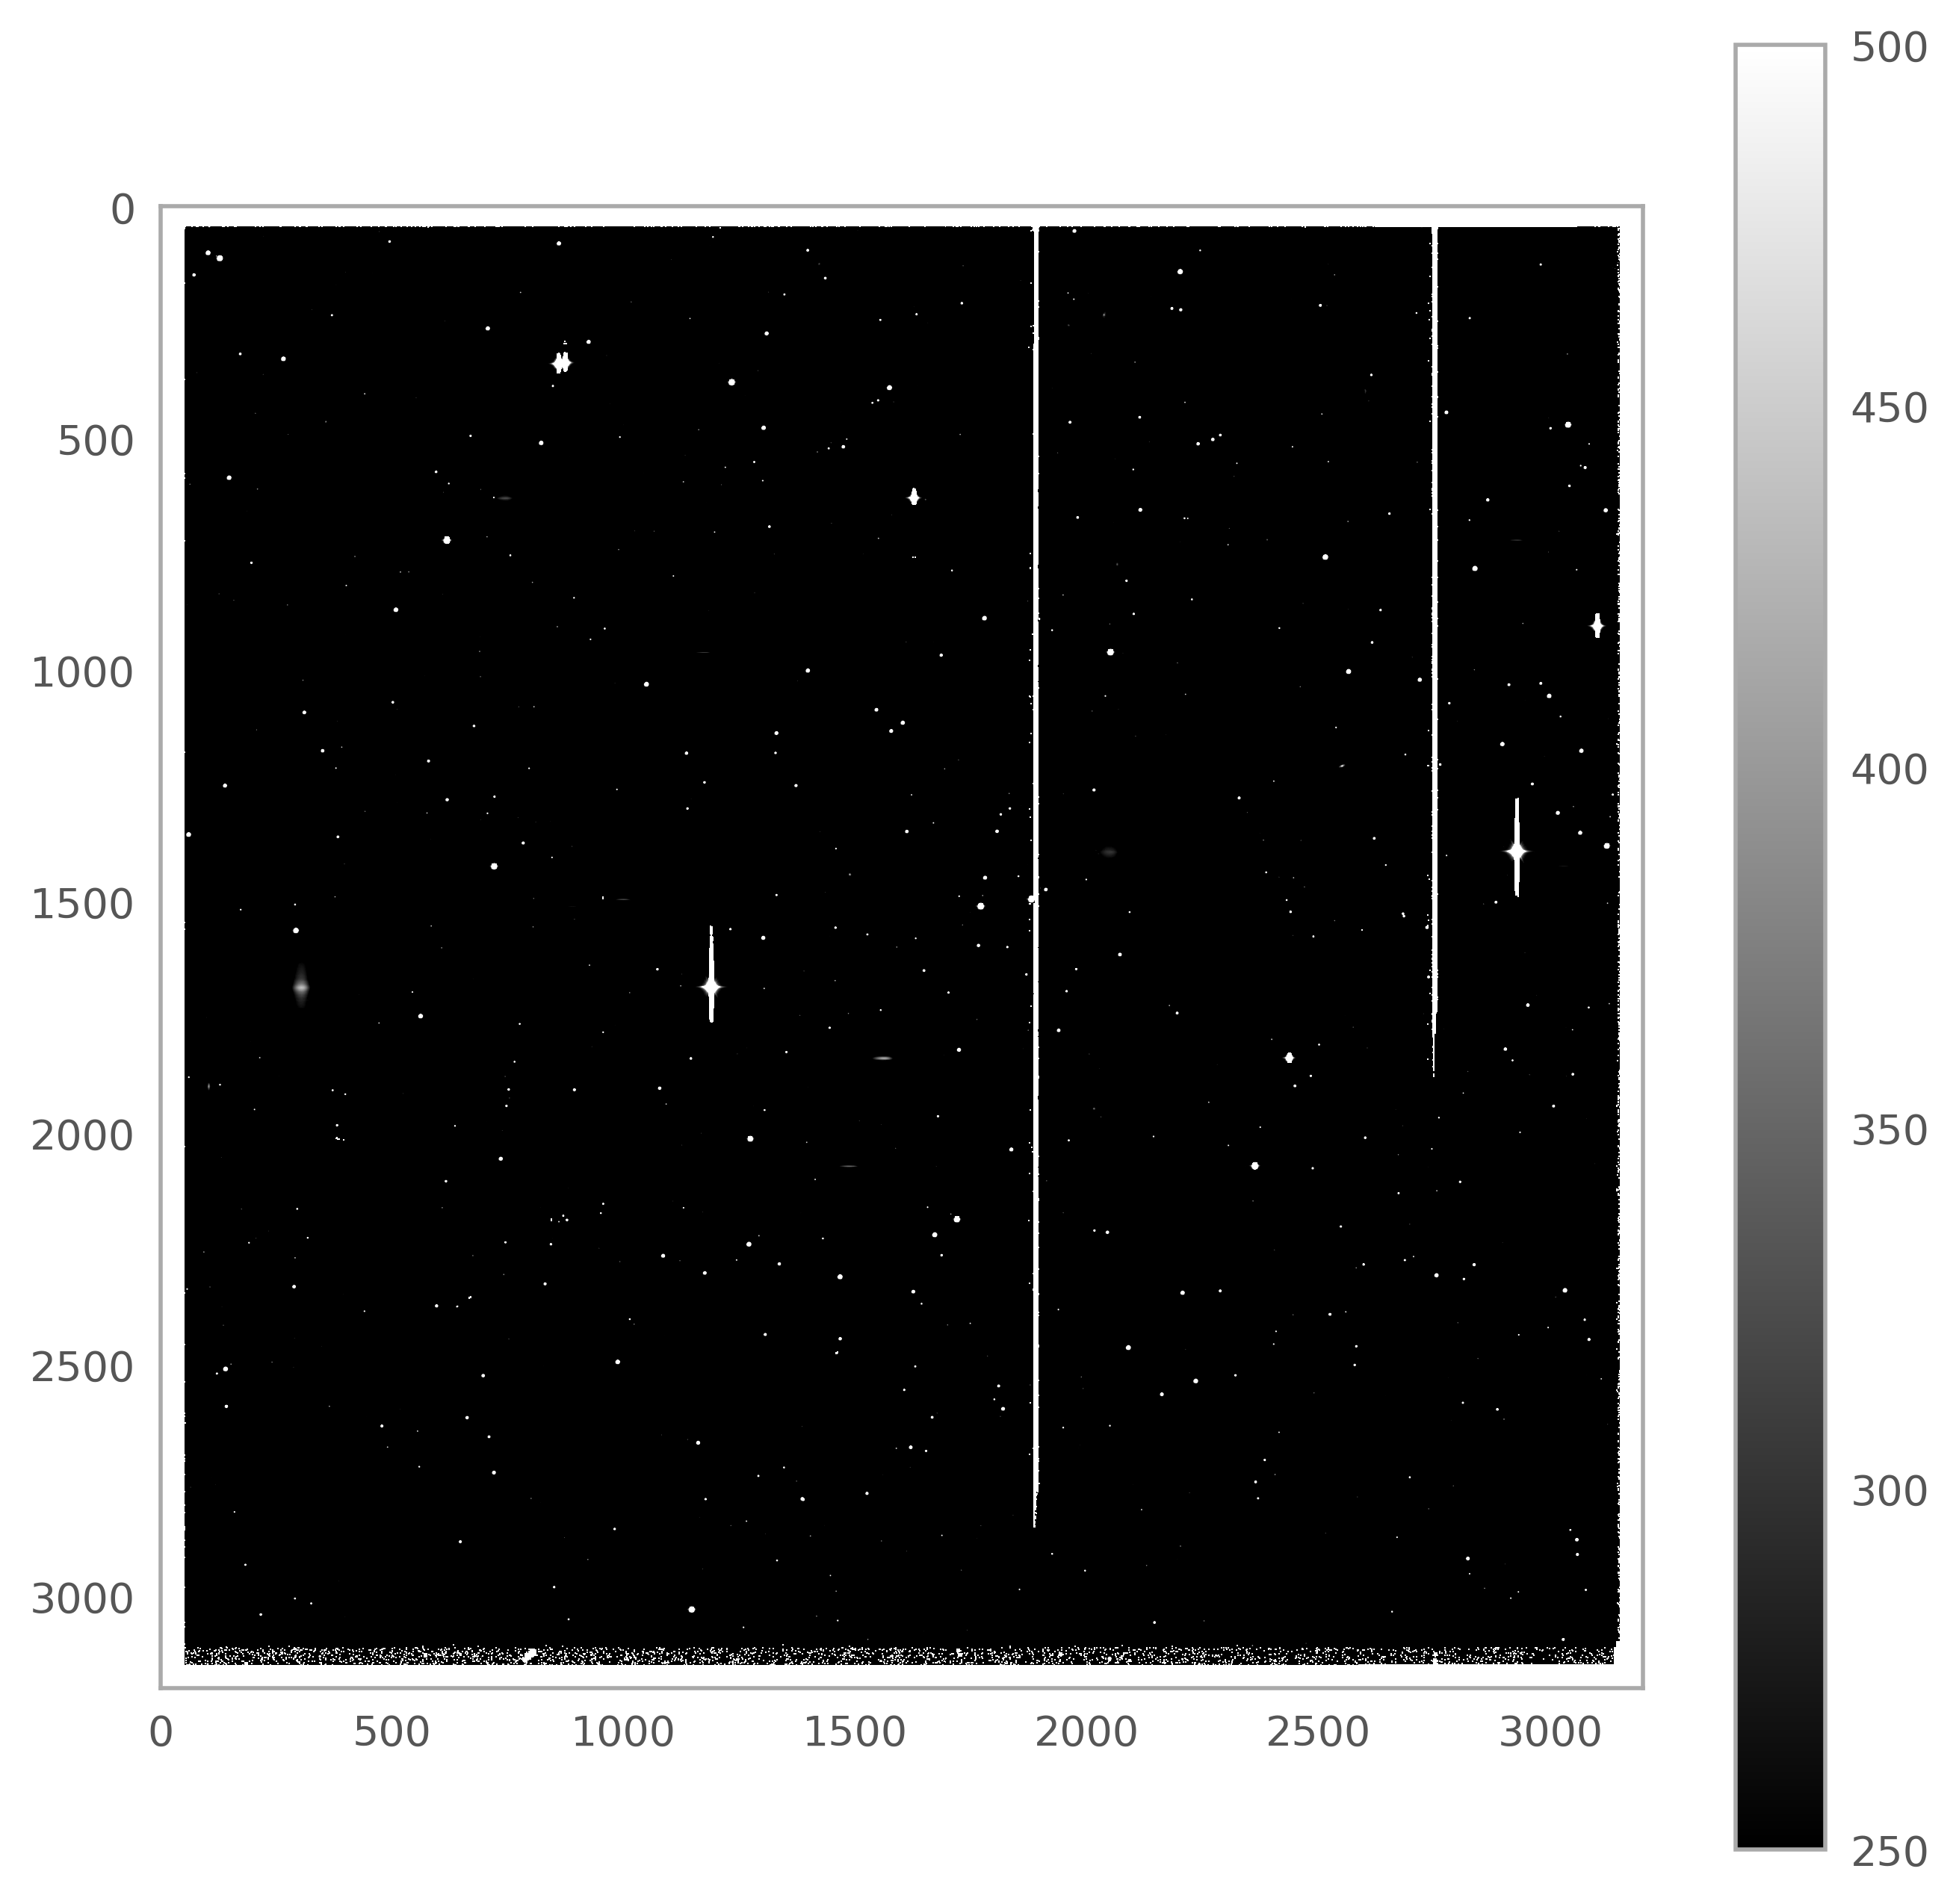

In [3]:
plot_image(img1_fname)

### 2. Sometimes streaks in images go vertically or horizontally across. Finding them is easy because we already know the angle of the streak. Use numpy to write a simple algorithm that can tell you if a streak exists, and which column/row it is on. Assume the streak is long (crosses the entire image) like in the case of LEO satellite streaks.


In [5]:
"""
Returns a list of the column/row indices where constant-intensity 
streaks that cross the entire image exist in the given image.
Returned list may be empty, in which case the image has no streaks.
IMAGE should be a 2D array representing an image.
"""
def find_streaks(image):
    streak_indices = []
    height = image.shape[0]
    width = image.shape[1]
    
    avg_intensity = np.mean(image)
    
    # loop through all rows
    for i in range(height):
        first_value = image[i, 0]
        row = image[i, :]
        if np.mean(row) > avg_intensity and np.all(row == first_value):
            # could also compare to row avg instead of first value, but avg takes more computation
            streak_indices.append(i)
    
    # loop through all columns
    for i in range(width):
        first_value = image[0, i]
        col = image[:, i]
        if np.mean(col) > avg_intensity and np.all(col == first_value):
            streak_indices.append(i)
            
    return streak_indices

img_data = fits.getdata(img1_fname, ext=0)
find_streaks(img_data)

[]

### 3. Bonus: For an image with a given size and assuming Gaussian (normal) noise in each pixel (and ignoring stars and other artefacts) what should the detection threshold for the algorithm be? How does this threshold depend on the false alarm rate?

In [6]:
# what is this threshold for?
"""
Usually detection algorithms output some "score" as in signal to noise ratio or something like that. 
If the noise is higher, you'd put a higher threshold for the cut distinguishing a detection and just a false alarm.

notes:
- signal-to-noise ratio: SNR = mean(image) / stdev(image)
- Gaussian noise means each pixel has a noise value N added to it, where N comes from the Gaussian distribution with
  mean = mean(image) and stdev = stdev(image)?
  OR
- Gaussian noise means, for each pixel: mean = the true value of the pixel, stdev=?? -> pixel's actual value is
  somewhere on Gaussian(mean, stdev)?

The detection threshold should depend on how much confidence we want (i.e. 95%, 99%, etc.) and stdev of the noise 
distribution. The higher the confidence, the lower the false negative rate, and vice versa. However, we don't know
what the noise distribution looks like, so we can't give an example detection threshold.

Also, the lower the signal-to-noise ratio, the more noise there is, and the higher the threshold needs to be.
"""
print('')

### 4. Write a script that downloads ZTF images from IRSA. You can use “ztfquery” which is a python package that helps automate some of the work. You should be able, at least, give the RA and Dec coordinates and get an image on disk somewhere that you know how to find and load it later.

In [7]:
from ztfquery import query

# downloaded sample: ra = 215.73722243, dec = 53.51269493 (5 images)
# downloaded sample: ra = 212.51393850, dec = 57.40139250 (4 images)

"""
Fetches ZTF reference images from ISRA within SIZE of given 
RA and DEC coordinates, and downloads them into the ./data folder.
Need an ISRA account for this to work properly.
https://irsa.ipac.caltech.edu/applications/ztf/
"""
def download_ZTF_images(ra, dec, size=0.0001):
    zquery = query.ZTFQuery()
    zquery.load_metadata(kind="ref",radec=[ra, dec], size=size)
    print(zquery.metatable[["field","filtercode", "ccdid","qid"]])
    zquery.download_data("refimg.fits", show_progress=True, verbose=True, overwrite=True)
    

In [8]:
download_ZTF_images(215.73722243, 53.51269493)

   field filtercode  ccdid  qid
0   1795         zr     15    3
1   1795         zg     15    3
2    792         zr      6    4
3    792         zi      6    4
4    792         zg      6    4
reference_path: {'paddedfield': '001795', 'filtercode': 'zr', 'paddedccdid': '15', 'qid': '3', 'fieldprefix': '001', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '001795', 'filtercode': 'zg', 'paddedccdid': '15', 'qid': '3', 'fieldprefix': '001', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zr', 'paddedccdid': '06', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zi', 'paddedccdid': '06', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zg', 'paddedccdid': '06', 'qid': '4', 'fiel

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:643: UserWarning: No parallel downloading
  warnings.warn("No parallel downloading")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/001/field001795/zr/ccd15/q3/ztf_001795_zr_c15_q3_refimg.fits to ./Data/ref/001/field001795/zr/ccd15/q3/ztf_001795_zr_c15_q3_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/001/field001795/zg/ccd15/q3/ztf_001795_zg_c15_q3_refimg.fits to ./Data/ref/001/field001795/zg/ccd15/q3/ztf_001795_zg_c15_q3_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zr/ccd06/q4/ztf_000792_zr_c06_q4_refimg.fits to ./Data/ref/000/field000792/zr/ccd06/q4/ztf_000792_zr_c06_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zi/ccd06/q4/ztf_000792_zi_c06_q4_refimg.fits to ./Data/ref/000/field000792/zi/ccd06/q4/ztf_000792_zi_c06_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zg/ccd06/q4/ztf_000792_zg_c06_q4_refimg.fits to ./Data/ref/000/field000792/zg/ccd06/q4/ztf_000792_zg_c06_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)


delayed


In [9]:
download_ZTF_images(212.51393850, 57.40139250)

   field filtercode  ccdid  qid
0   1826         zr      6    3
1    792         zg     15    4
2    792         zr     15    4
3    792         zi     15    4
reference_path: {'paddedfield': '001826', 'filtercode': 'zr', 'paddedccdid': '06', 'qid': '3', 'fieldprefix': '001', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zg', 'paddedccdid': '15', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zr', 'paddedccdid': '15', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000792', 'filtercode': 'zi', 'paddedccdid': '15', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:643: UserWarning: No parallel downloading
  warnings.warn("No parallel downloading")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/001/field001826/zr/ccd06/q3/ztf_001826_zr_c06_q3_refimg.fits to ./Data/ref/001/field001826/zr/ccd06/q3/ztf_001826_zr_c06_q3_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zg/ccd15/q4/ztf_000792_zg_c15_q4_refimg.fits to ./Data/ref/000/field000792/zg/ccd15/q4/ztf_000792_zg_c15_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zr/ccd15/q4/ztf_000792_zr_c15_q4_refimg.fits to ./Data/ref/000/field000792/zr/ccd15/q4/ztf_000792_zr_c15_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000792/zi/ccd15/q4/ztf_000792_zi_c15_q4_refimg.fits to ./Data/ref/000/field000792/zi/ccd15/q4/ztf_000792_zi_c15_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)


delayed


Filename: Data/ref/000/field000792/zi/ccd15/q4/ztf_000792_zi_c15_q4_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


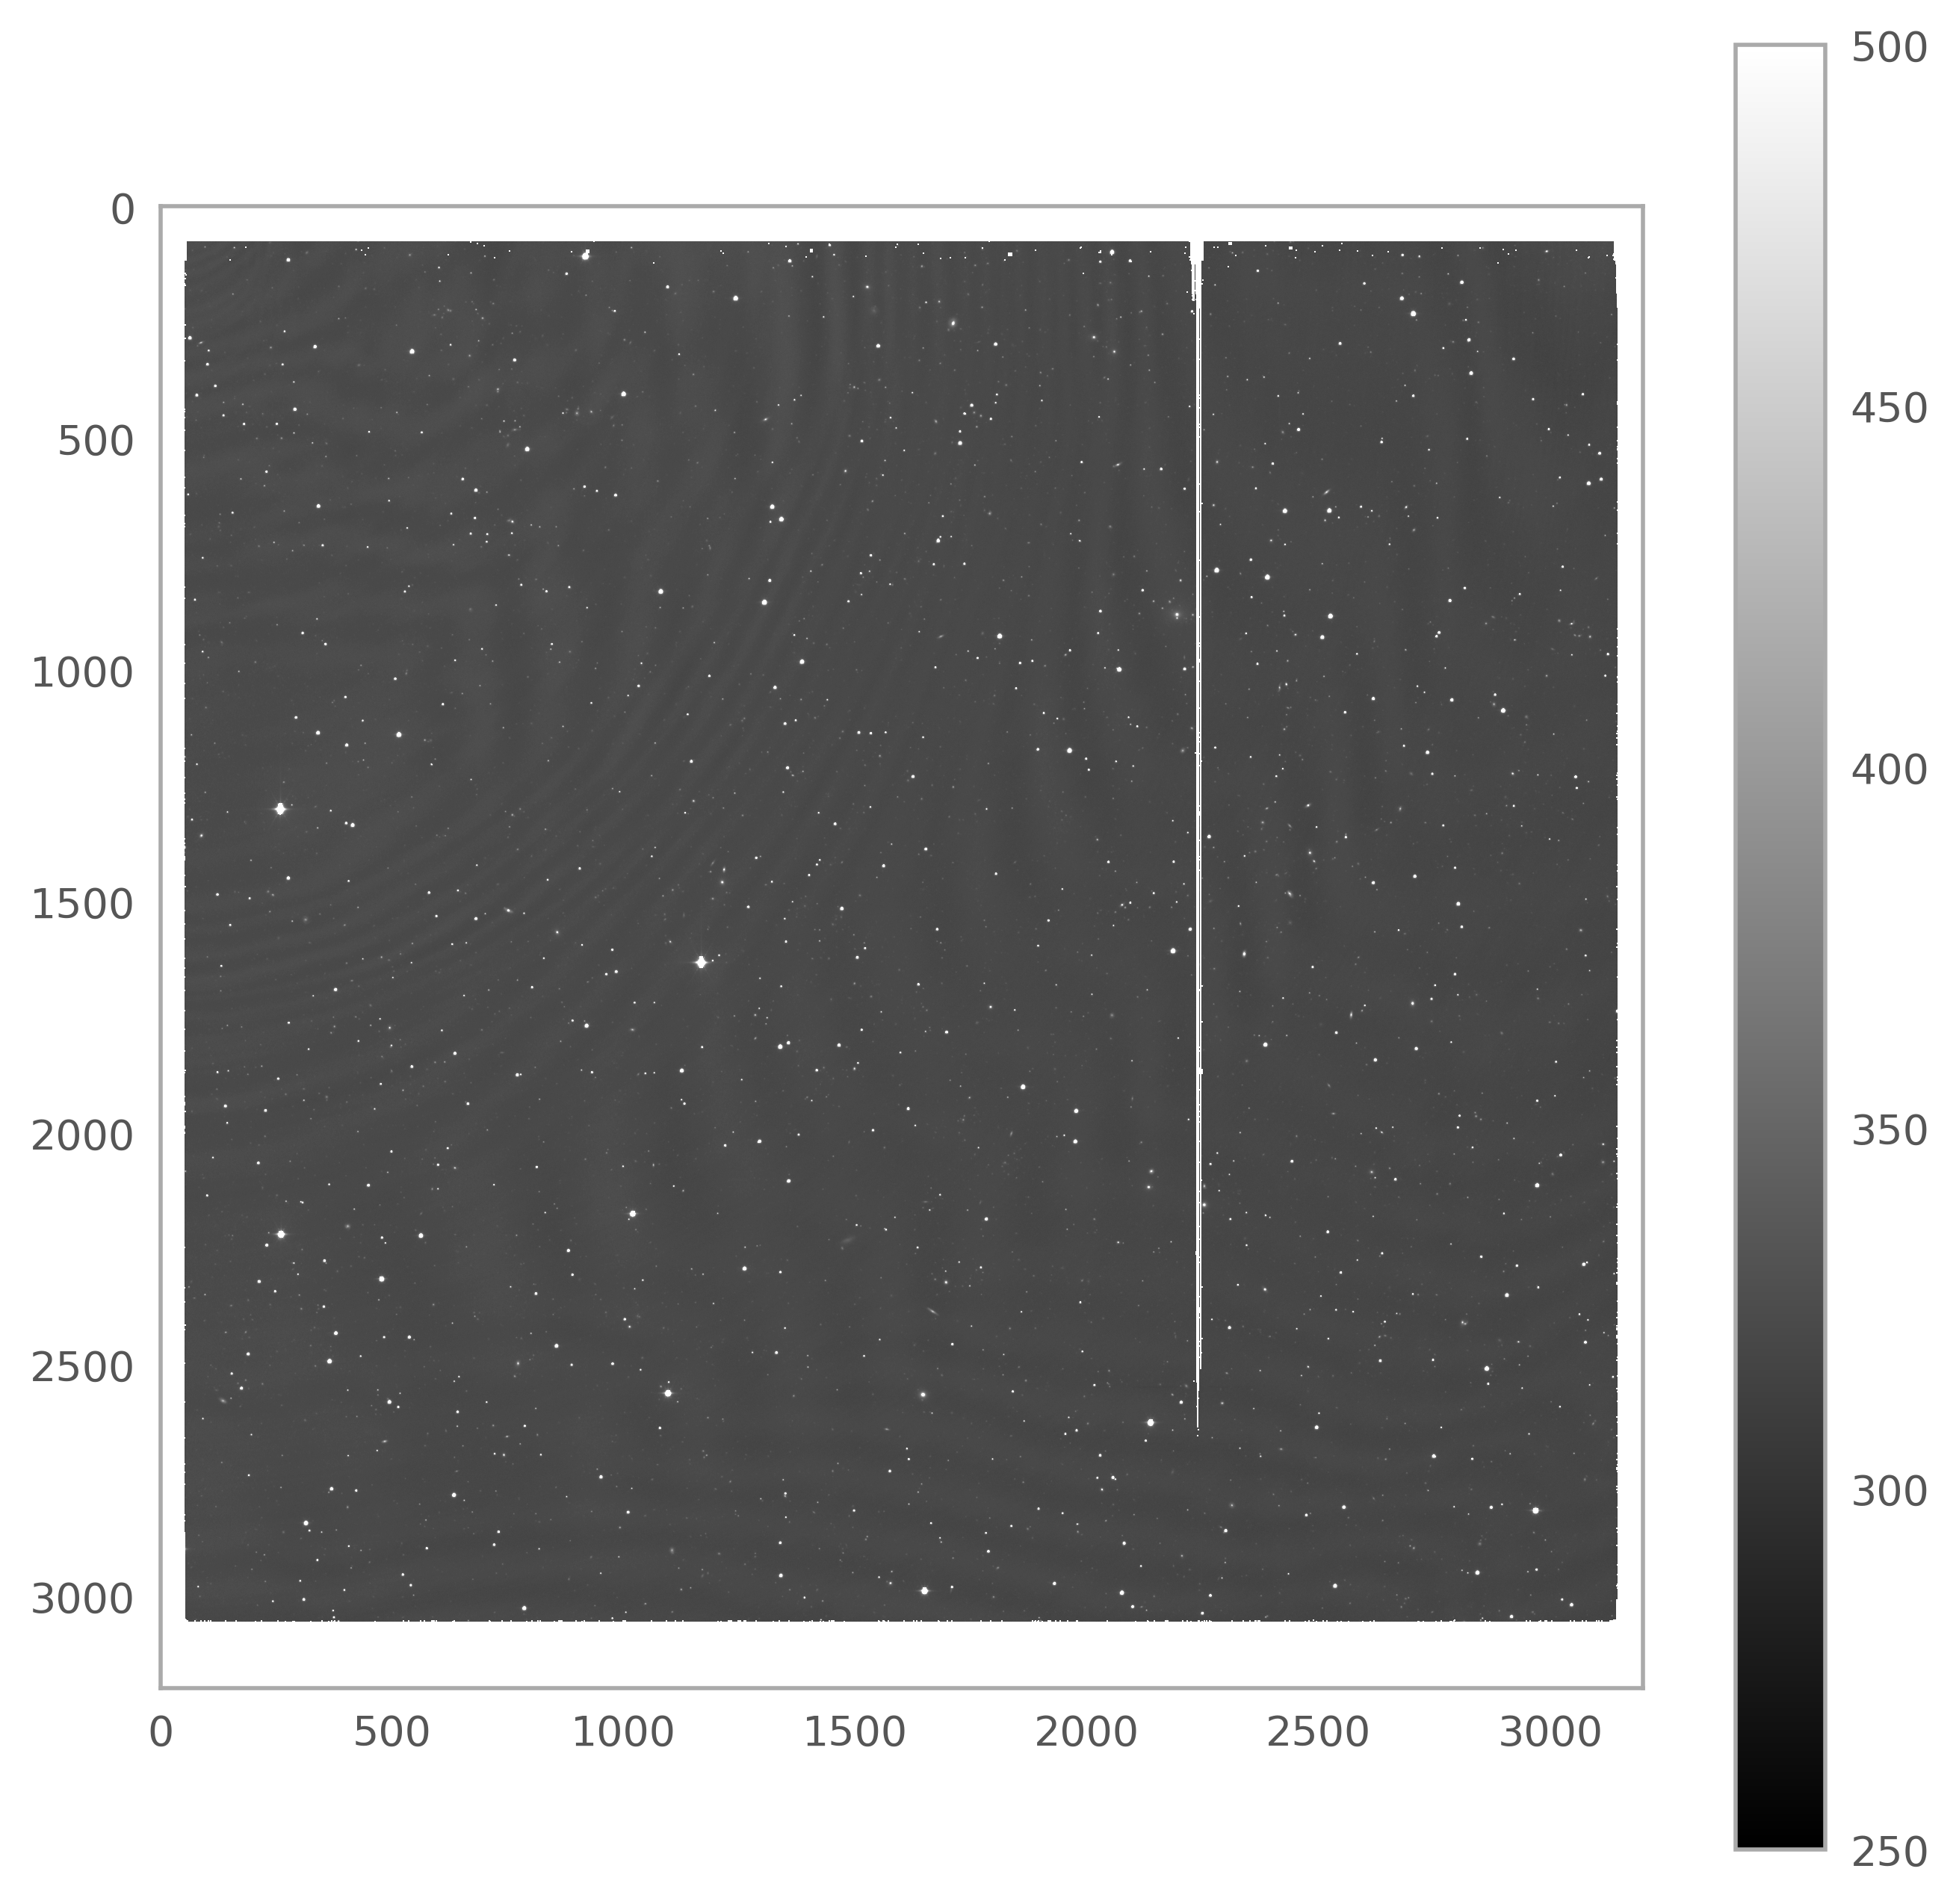

In [10]:
img2_fname = "Data/ref/000/field000792/zi/ccd15/q4/ztf_000792_zi_c15_q4_refimg.fits"
plot_image(img2_fname, norm=False)

Filename: Data/ref/001/field001795/zr/ccd15/q3/ztf_001795_zr_c15_q3_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


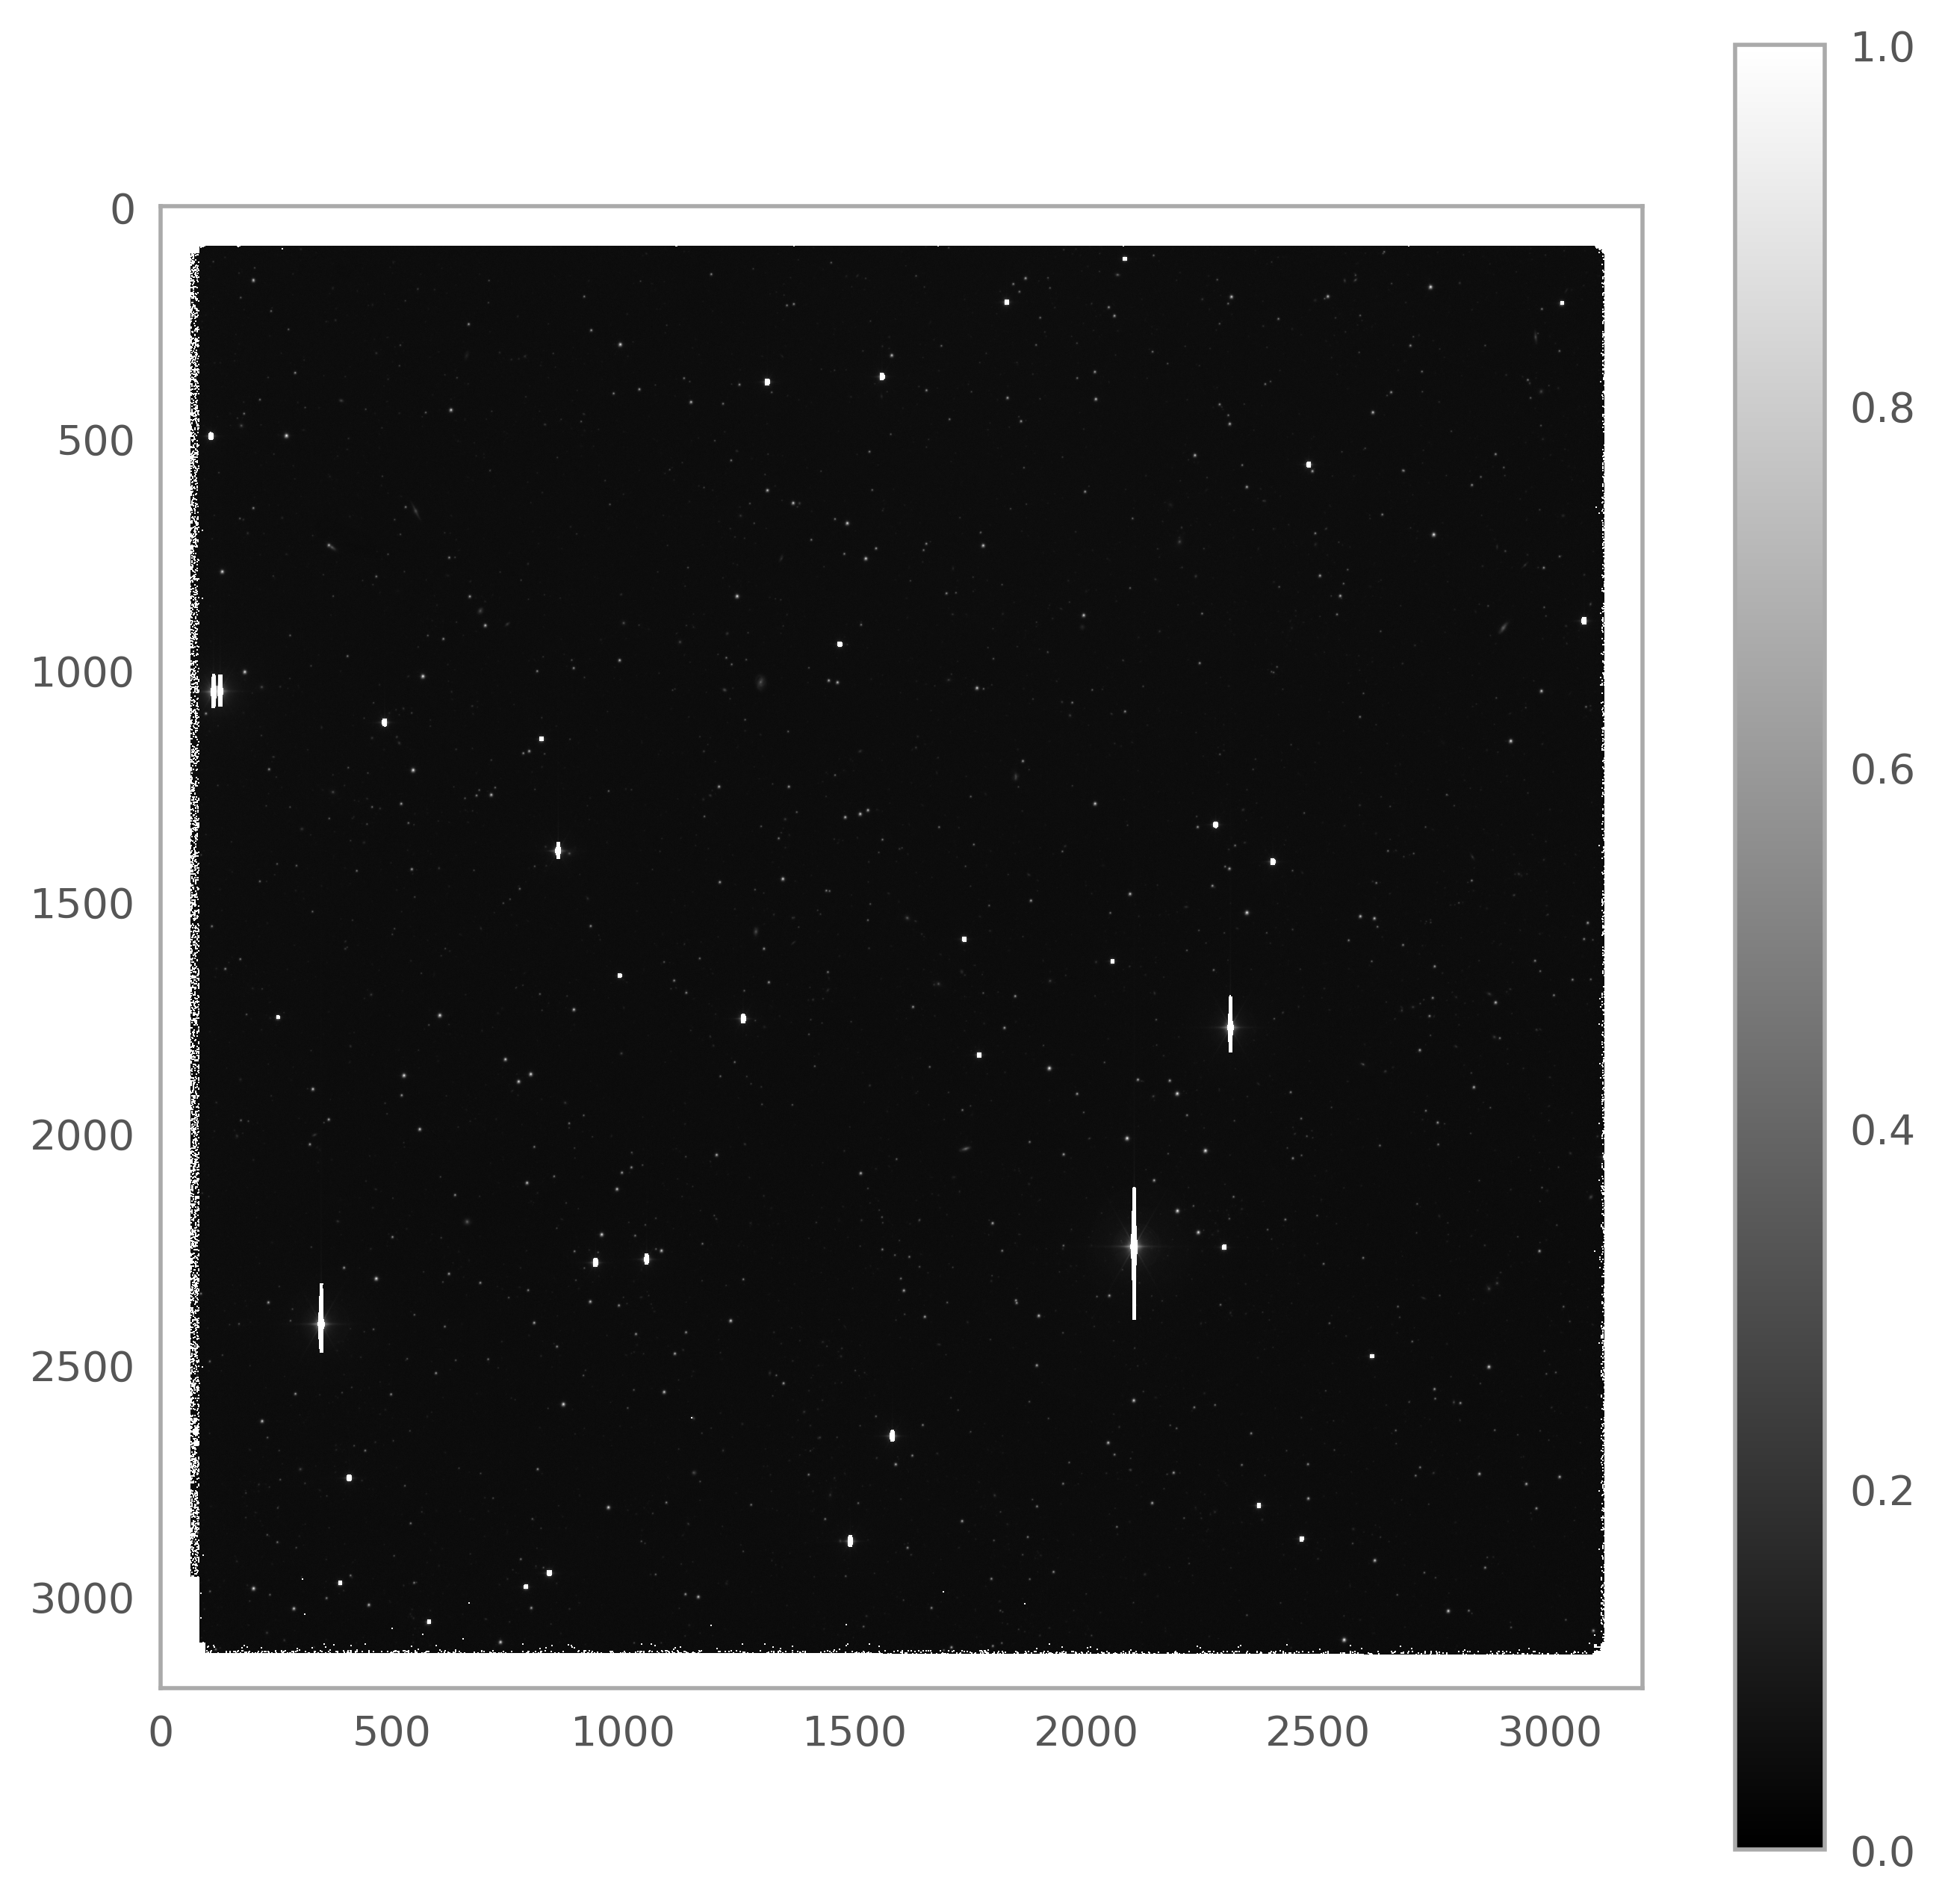

In [11]:
img3_fname = "Data/ref/001/field001795/zr/ccd15/q3/ztf_001795_zr_c15_q3_refimg.fits"
plot_image(img3_fname, norm=True)

Filename: Data/ref/001/field001826/zr/ccd06/q3/ztf_001826_zr_c06_q3_refimg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      87   (3200, 3200)   float32   


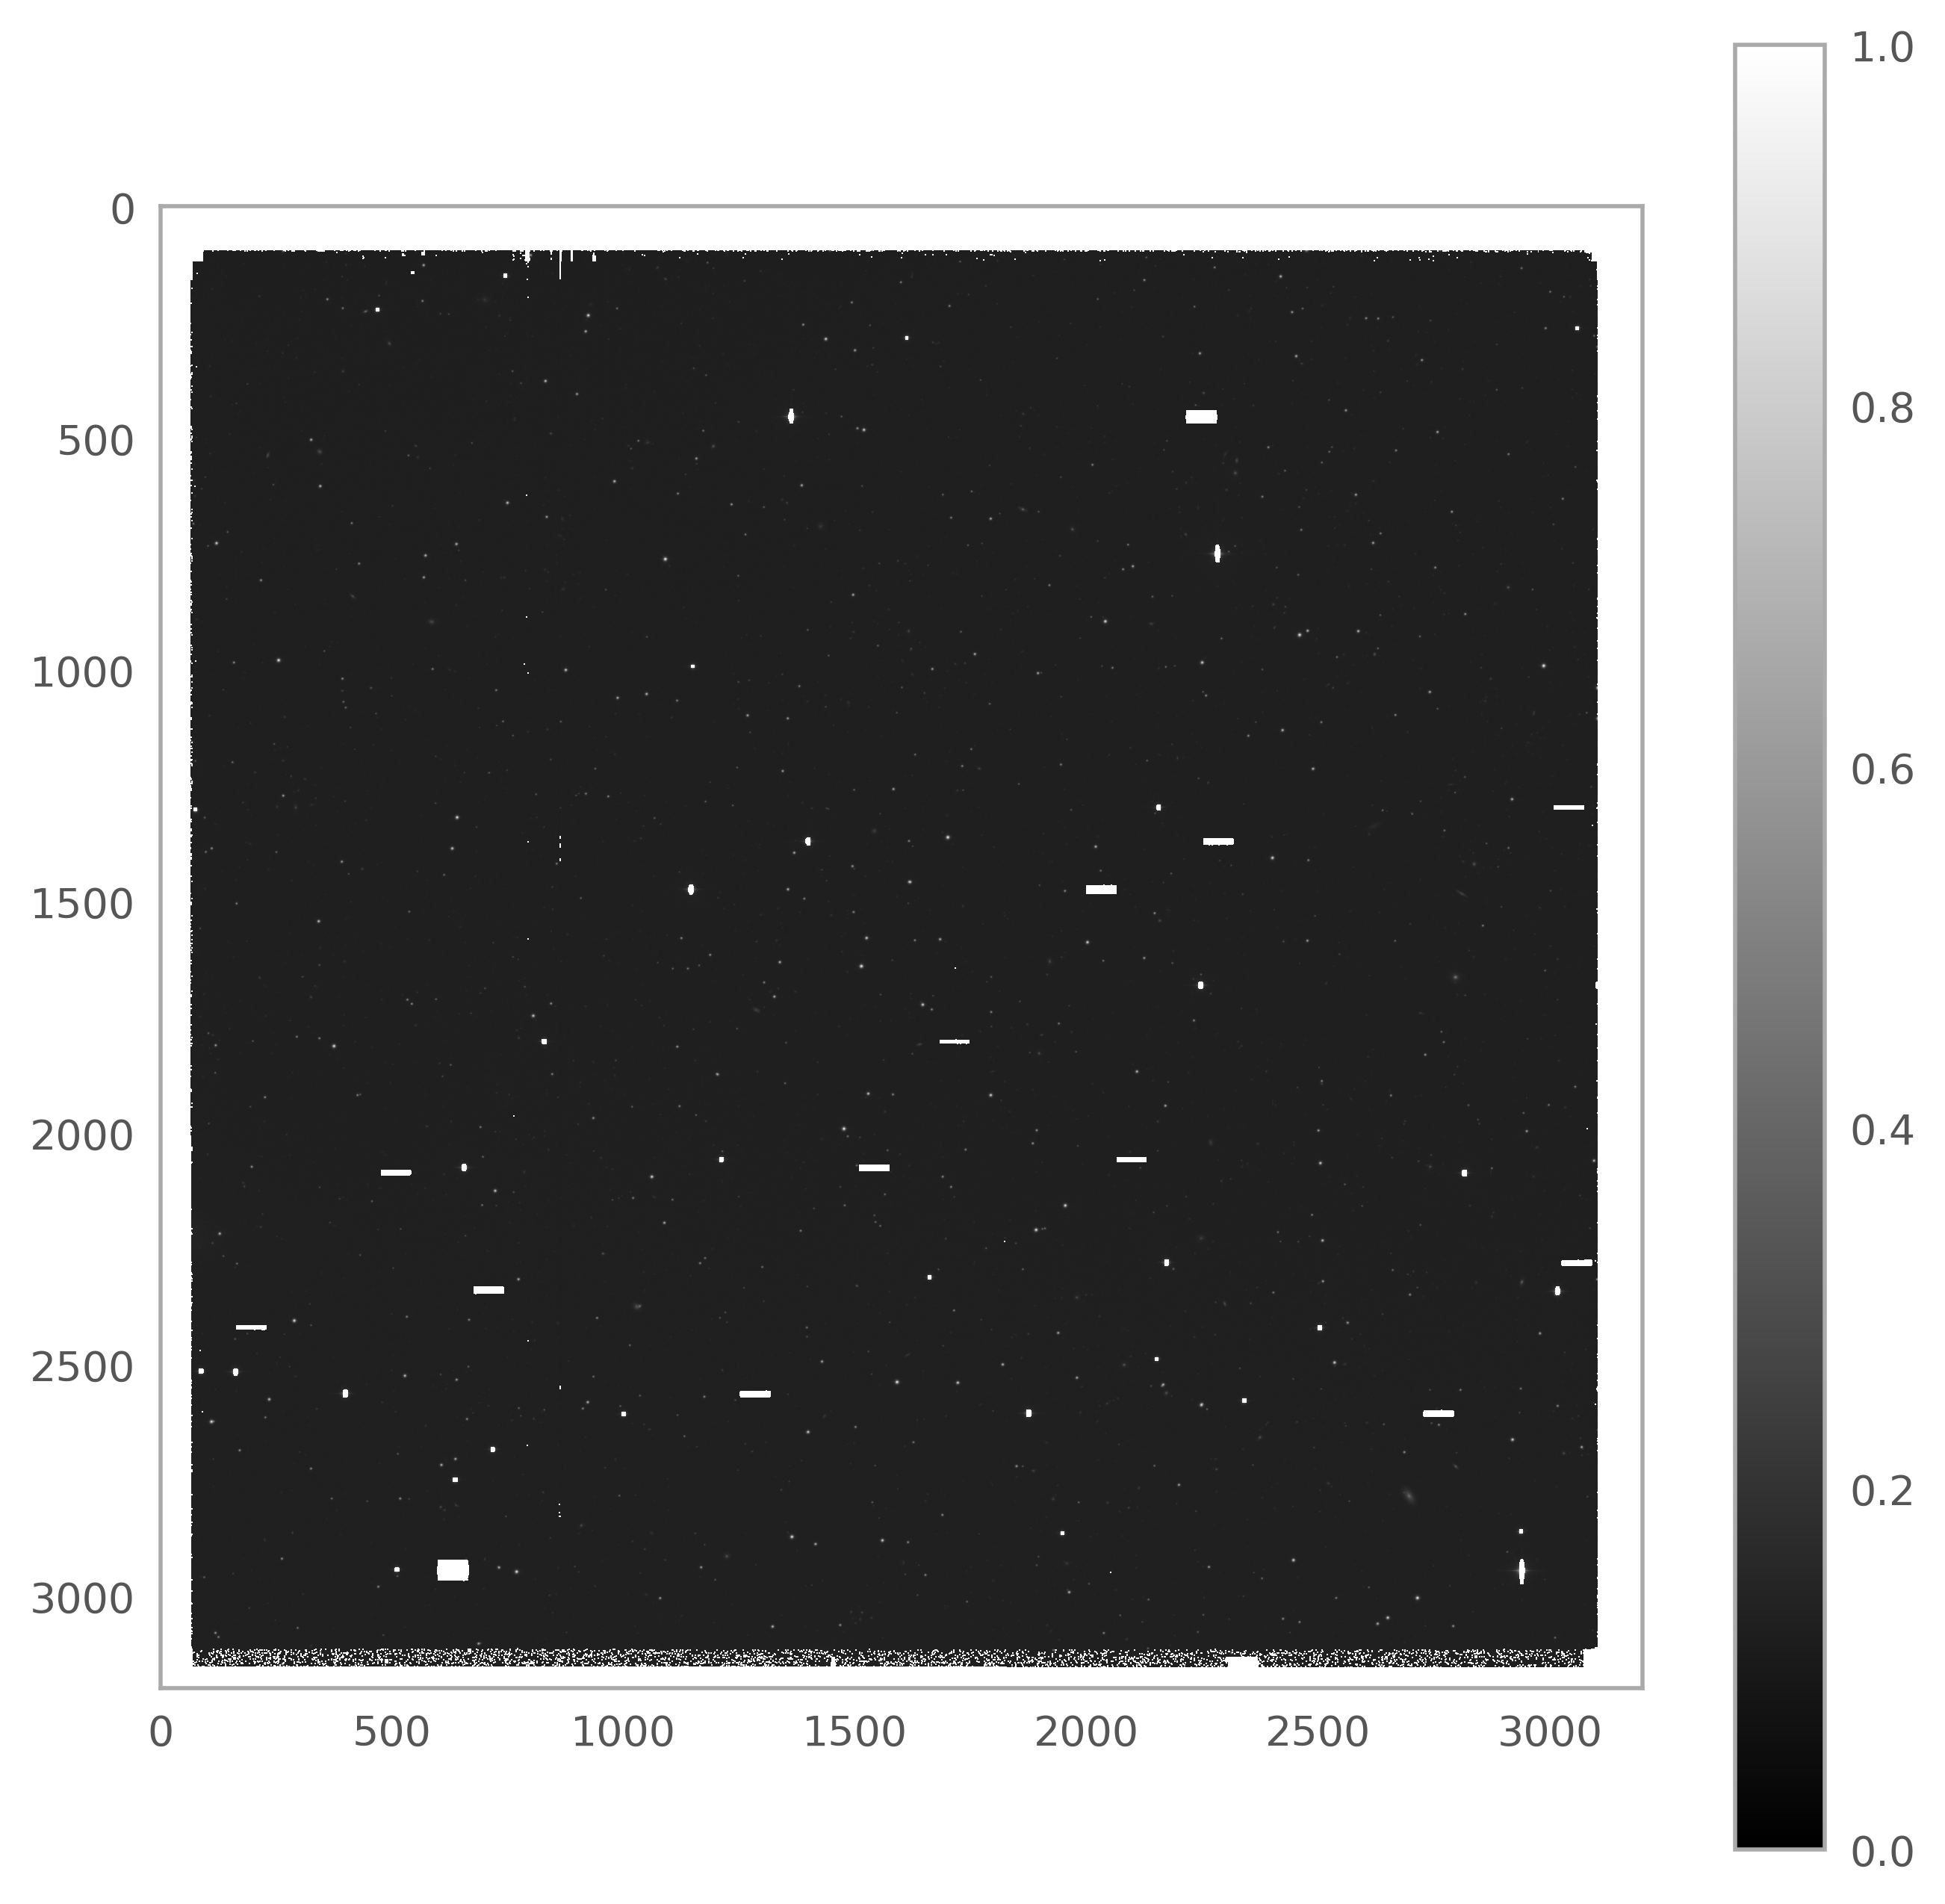

In [12]:
img4_fname = "Data/ref/001/field001826/zr/ccd06/q3/ztf_001826_zr_c06_q3_refimg.fits"
plot_image(img4_fname, norm=True)

In [13]:
download_ZTF_images(213, 0)

   field filtercode  ccdid  qid
0    426         zi     15    4
1    426         zr     15    4
2    426         zg     15    4
reference_path: {'paddedfield': '000426', 'filtercode': 'zi', 'paddedccdid': '15', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000426', 'filtercode': 'zr', 'paddedccdid': '15', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}
reference_path: {'paddedfield': '000426', 'filtercode': 'zg', 'paddedccdid': '15', 'qid': '4', 'fieldprefix': '000', 'suffix': 'refimg.fits', 'source': 'None', 'verbose': True}


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:643: UserWarning: No parallel downloading
  warnings.warn("No parallel downloading")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000426/zi/ccd15/q4/ztf_000426_zi_c15_q4_refimg.fits to ./Data/ref/000/field000426/zi/ccd15/q4/ztf_000426_zi_c15_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000426/zr/ccd15/q4/ztf_000426_zr_c15_q4_refimg.fits to ./Data/ref/000/field000426/zr/ccd15/q4/ztf_000426_zr_c15_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ztfquery/io.py:696: UserWarning: downloading https://irsa.ipac.caltech.edu/ibe/data/ztf/products/ref/000/field000426/zg/ccd15/q4/ztf_000426_zg_c15_q4_refimg.fits to ./Data/ref/000/field000426/zg/ccd15/q4/ztf_000426_zg_c15_q4_refimg.fits
  warnings.warn("downloading %s to %s"%(url,fileout))


FloatProgress(value=0.0)


delayed


### 5. Bonus: what coordinates should we use to look for geostationary satellites? Would the first order answer change if we include the position of the ZTF telescope (on mount Palomar in California) and the altitude of the geostationary orbit above the Earth’s equator?

In [30]:
"""
In question 5 the "first order" would be just above the equator. The "second order" takes into account that we are 
looking at objects at a given height (i.e., not at infinity) and from a specific location on Earth. That means we 
can do better in terms of the coordinates for where to look in the sky.

notes:
- geostationary satellites are always 35,786 km above earth's equator
- earth's radius is 6378 km at equator
- Mt. Palomar, CA is at latitude 33.36 degrees

Geostationary satellites always have a declination of about 0, and the right ascension can be anything, so our
first order answer would be simply any coordinates with dec=0.

But considering a finite-distance satellite in the sky, computations show that we should look about 5.44 degrees
below the equator (dec = -5.44 degrees). See image below.
"""
print("first order: dec = 0 \nsecond order: dec = -5.44")

first order: dec = 0 
second order: dec = -5.44


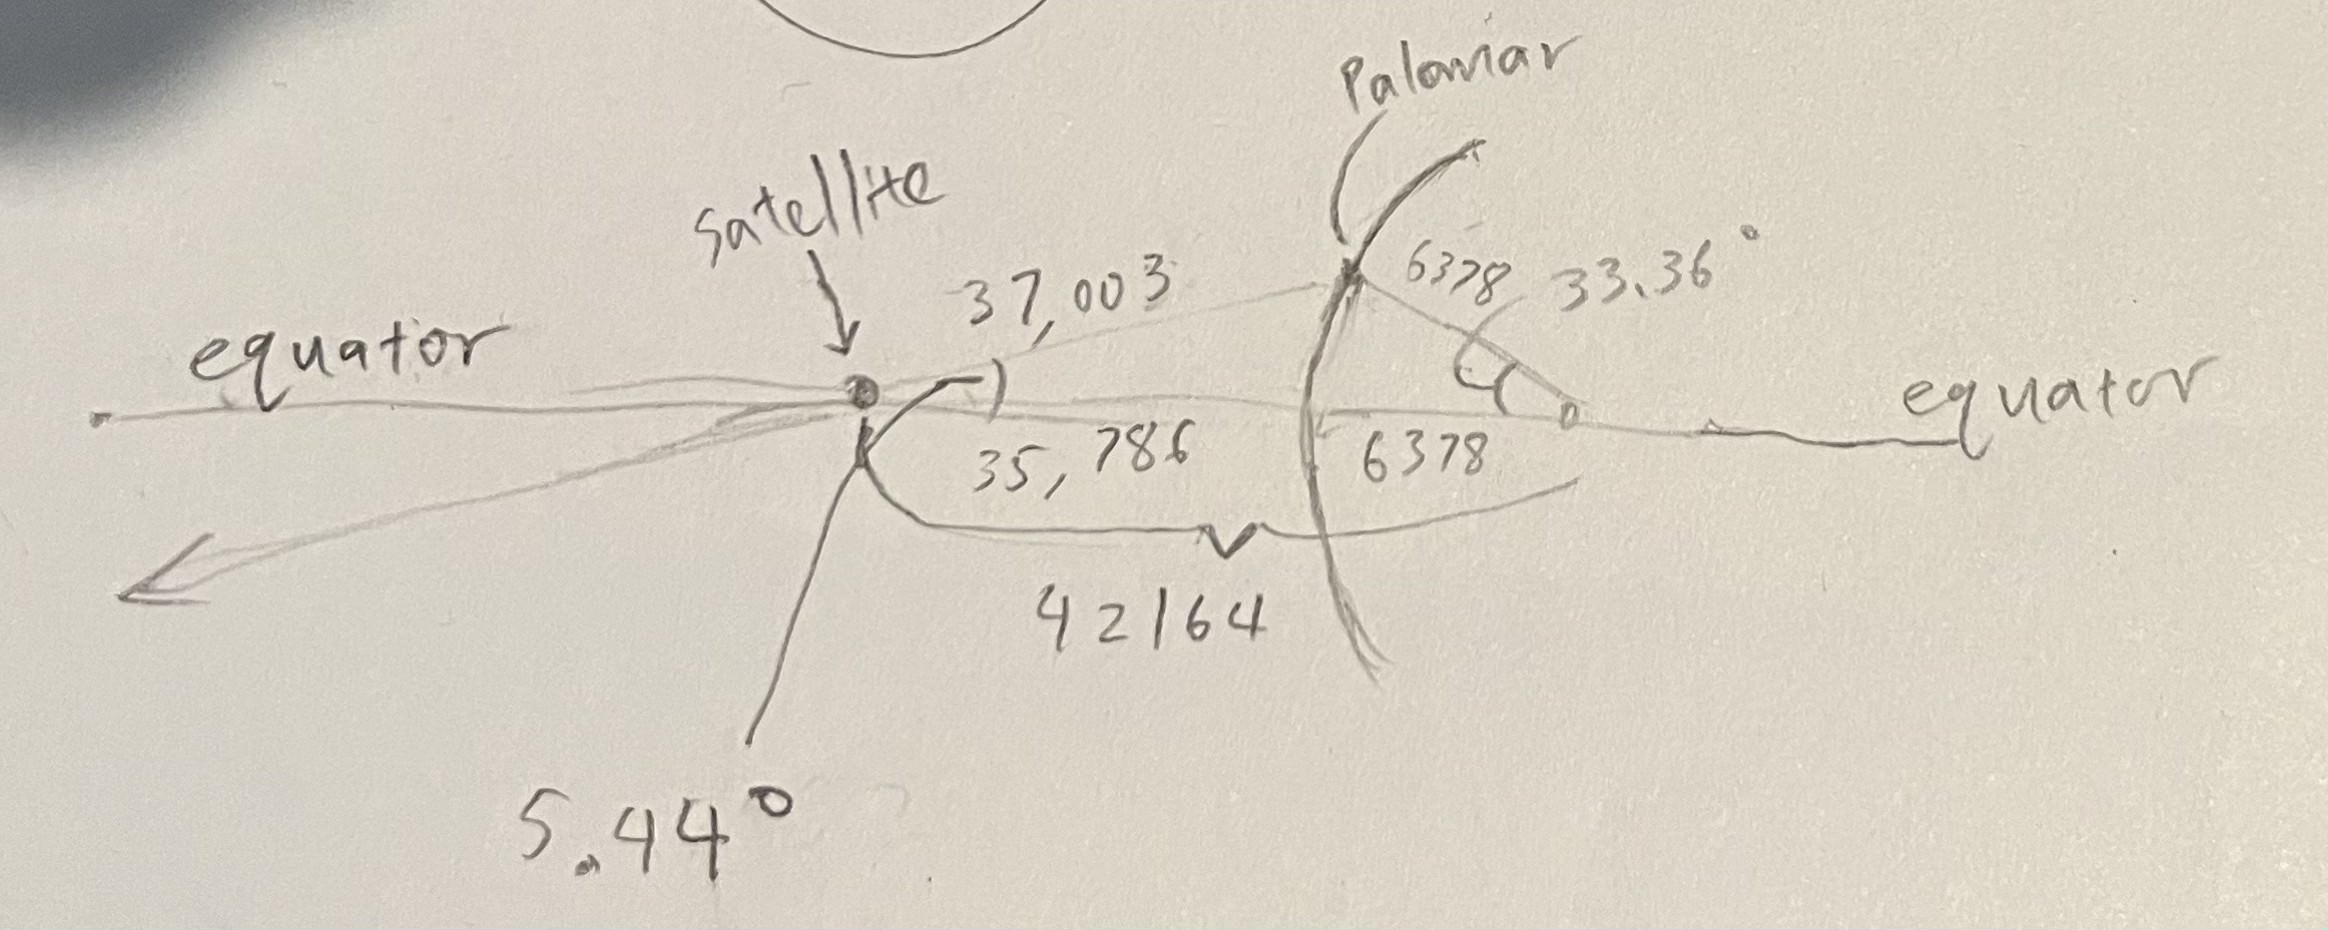

In [31]:
# query images with latitude 0
query = query.ZTFQuery()
zquery.load_metadata(kind="ref",radec=[100, 0], size=1)
print(zquery.metatable[["field","filtercode", "ccdid","qid"]])

    field filtercode  ccdid  qid
0    1455         zr      8    4
1    1455         zr      7    3
2    1455         zg      7    2
3    1455         zg      8    4
4     410         zi     14    3
5     410         zi     15    4
6     410         zi     15    1
7     410         zr     14    2
8     410         zg     14    2
9    1455         zr      7    2
10    410         zg     15    1
11    410         zg     14    3
12    410         zr     15    1
13    410         zi     14    2
14   1455         zr      8    1
15   1455         zg      8    1
16   1455         zg      7    3
17    410         zr     14    3
18    410         zr     15    4
19    410         zg     15    4


In [32]:
# query images with latitude -5.44
query = query.ZTFQuery()
zquery.load_metadata(kind="ref",radec=[100, -5.44], size=1)
print(zquery.metatable[["field","filtercode", "ccdid","qid"]])

    field filtercode  ccdid  qid
0     410         zg      3    1
1     410         zr      3    1
2    1403         zr     10    1
3     410         zi      3    1
4    1403         zr     10    2
5    1403         zg     10    1
6     410         zr      3    4
7     410         zi      3    4
8     410         zi      2    2
9     410         zg      3    4
10    410         zi      2    3
11    410         zg      2    3
12   1403         zr     10    4
13    410         zr      2    2
14    410         zr      2    3
15   1403         zg     10    4
16   1403         zg     10    2
17    410         zg      2    2
18   1403         zg     10    3
19   1403         zr     10    3
